In [1]:
#add the Modules folder in your python PATH
import sys
sys.path.remove("/home2/datahome/jgula/Python_Modules") #just for JG
sys.path.append("./Modules/") 

#import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib notebook

#Some standard modules
import sys, os
import numpy as np
import time as tm
from netCDF4 import Dataset
import numpy.ma as ma

#Specific modules needed for pyticles
import pyticles_sig_sa as part
import pyticles_3d_sig_sa as partF

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#Simulations (path, data...)
from R_files import load
from R_netcdf import ionetcdf

In [2]:
###############################
def load_particles(ncfile,itime):
###############################
    '''
    Load values for all variables for timestep itime
    '''

    nc = Dataset(ncfile, 'r')
    
    parameters = nc.simulation
    base = nc.base

    print 'dimensions are', nc.variables['px'].shape

    px = nc.variables['px'][itime,:]
    py = nc.variables['py'][itime,:]
    pz = nc.variables['pz'][itime,:]
    
    time = nc.variables['time'][itime]
    print 'time is', time
    
    try:
        ptemp = nc.variables['pt'][itime,:]
        psalt = nc.variables['ps'][itime,:]
        plon = nc.variables['plon'][itime,:]
        plat = nc.variables['plat'][itime,:]
        pdepth = nc.variables['pdepth'][itime,:]
        ptopo = nc.variables['ptopo'][itime,:]
    except:
        'missing variables'

    nc.close()
    
    return px,py,pz,ptemp,psalt,plon,plat,pdepth,ptopo,time,parameters

#########################
    
    
ncfile = './case1/polgyr_case1_14_1000.nc' #the netcdf file containing particles data

fifig = './case1'

itime = 2
[px,py,pz,ptemp,psalt,plon,plat,pdepth,ptopo,time,parameters] = load_particles(ncfile,itime)
    

dimensions are (32, 10271)
time is 1002.0


In [3]:
# Load simul
simul = load(simul = parameters);
depths = simul.coord[4];

simul.update(time);


args ([u'polgyr', u'[0,10000,0,10000,[1,100,1]]', u'1000'],)
args[0] [u'polgyr', u'[0,10000,0,10000,[1,100,1]]', u'1000']
len(args[0]) 3
time of simulation is: 1000
coord
loading /home/datawork-lops-osi/jgula/POLGYR/polgyr_grd.nc
loading /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.01000.nc
get domain [0,10000,0,10000,[1,100,1]] [0,10
coordmax
loading /home/datawork-lops-osi/jgula/POLGYR/polgyr_grd.nc
loading /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.01000.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
dt
dt is read in  /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.01000.nc
[0, 1602, 0, 2002, array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])]
ncname0,ny

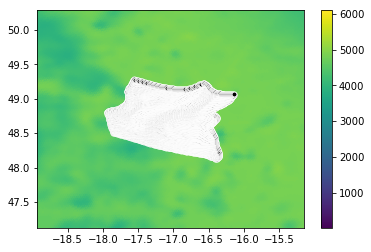

In [4]:
# plot particles position on the domain

marksize=5.; colorpoint = 'black'; colorpointedge='white'

plt.pcolormesh(simul.x, simul.y,simul.topo); plt.colorbar()
plt.plot(plon,plat,'o',markersize=marksize, markerfacecolor=colorpoint, markeredgecolor=colorpointedge)
plt.axis([plon.min()-1,plon.max()+1,plat.min()-1, plat.max()+1]);
plt.show()



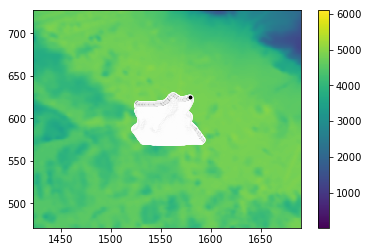

In [5]:
# Note that px,y are on psi-grid. So you need add 0.5 grid points to convert them to rho grids (see below)

marksize=5.; colorpoint = 'black'; colorpointedge='white'

plt.pcolormesh(simul.topo.T); plt.colorbar()
plt.plot(px+0.5,py+0.5,'o',markersize=marksize, markerfacecolor=colorpoint, markeredgecolor=colorpointedge)
plt.axis([px.min()-100,px.max()+100,py.min()-100, py.max()+100]);


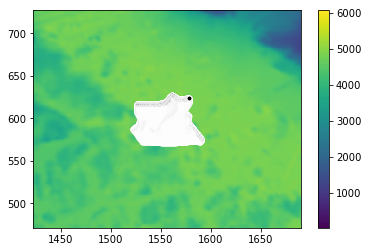

In [6]:
# alternatively you can plot everythong on the ps grid.

marksize=5.; colorpoint = 'black'; colorpointedge='white'

plt.pcolormesh(part.rho2psi(simul.topo.T)); plt.colorbar()
plt.plot(px,py,'o',markersize=marksize, markerfacecolor=colorpoint, markeredgecolor=colorpointedge)
plt.axis([px.min()-100,px.max()+100,py.min()-100, py.max()+100]);
